In [1]:
import tradingeconomics as te
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:
endDate = str((datetime.now() + timedelta(days=1)).date())

In [4]:
raw_hist_general_df = te.getHistoricalEurostat(ID = '78963', initDate = '2018-01-01', endDate = endDate, output_type = 'df')
raw_hist_general_df.head()

,ID,Date,Value,LastUpdate
0,78963,2021-09-30T00:00:00,94.27,2021-10-20T11:44:00
1,78963,2021-08-31T00:00:00,98.04,2021-09-17T11:39:00
2,78963,2021-07-31T00:00:00,96.34,2021-08-18T11:38:00
3,78963,2021-06-30T00:00:00,91.33,2021-07-30T11:42:00
4,78963,2021-05-31T00:00:00,90.94,2021-06-17T11:40:00


In [5]:
raw_hist_air_df=te.getHistoricalEurostat(ID = '75708', initDate = '2018-01-01', endDate = endDate, output_type = 'df')
raw_hist_air_df.head()

,ID,Date,Value,LastUpdate
0,75708,2021-09-30T00:00:00,100.82,2021-10-20T11:43:00
1,75708,2021-08-31T00:00:00,121.12,2021-09-17T11:38:00
2,75708,2021-07-31T00:00:00,112.13,2021-08-18T11:37:00
3,75708,2021-06-30T00:00:00,85.20,2021-07-30T11:40:00
4,75708,2021-05-31T00:00:00,83.14,2021-06-17T11:38:00


In [6]:
raw_hist_train_df=te.getHistoricalEurostat(ID = '78493', initDate = '2018-01-01', endDate = endDate, output_type = 'df')
raw_hist_train_df.head()

,ID,Date,Value,LastUpdate
0,78493,2021-09-30T00:00:00,96.54,2021-10-20T11:44:00
1,78493,2021-08-31T00:00:00,96.54,2021-09-17T11:39:00
2,78493,2021-07-31T00:00:00,96.54,2021-08-18T11:38:00
3,78493,2021-06-30T00:00:00,96.53,2021-07-30T11:41:00
4,78493,2021-05-31T00:00:00,96.53,2021-06-17T11:40:00


In [7]:
raw_hist_bus_df=te.getHistoricalEurostat(ID = '77769', initDate = '2018-01-01', endDate = endDate, output_type = 'df')
raw_hist_bus_df.head()

,ID,Date,Value,LastUpdate
0,77769,2021-09-30T00:00:00,90.73,2021-10-20T11:44:00
1,77769,2021-08-31T00:00:00,90.73,2021-09-17T11:38:00
2,77769,2021-07-31T00:00:00,90.64,2021-08-18T11:38:00
3,77769,2021-06-30T00:00:00,90.64,2021-07-30T11:41:00
4,77769,2021-05-31T00:00:00,90.58,2021-06-17T11:39:00


In [8]:
raw_hist_underground_df=te.getHistoricalEurostat(ID = '85533', initDate = '2018-01-01', endDate = endDate, output_type = 'df')
raw_hist_underground_df.head()

,ID,Date,Value,LastUpdate
0,85533,2021-09-30T00:00:00,91.86,2021-10-20T11:47:00
1,85533,2021-08-31T00:00:00,91.86,2021-09-17T11:41:00
2,85533,2021-07-31T00:00:00,91.86,2021-08-18T11:41:00
3,85533,2021-06-30T00:00:00,91.86,2021-07-30T11:44:00
4,85533,2021-05-31T00:00:00,91.86,2021-06-17T11:42:00


In [9]:
general_df = raw_hist_general_df[['Date', 'Value']].rename(columns = {'Value': 'General'}).set_index('Date')
air_df = raw_hist_air_df[['Date', 'Value']].rename(columns = {'Value': 'Air'}).set_index('Date')
train_df = raw_hist_train_df[['Date', 'Value']].rename(columns = {'Value': 'Train'}).set_index('Date')
bus_df = raw_hist_bus_df[['Date', 'Value']].rename(columns = {'Value': 'Bus'}).set_index('Date')
underground_df = raw_hist_underground_df[['Date', 'Value']].rename(columns = {'Value': 'Underground'}).set_index('Date')

df = pd.merge(pd.merge(air_df, train_df, on ='Date'), bus_df, on='Date')
df = pd.merge(pd.merge(df, underground_df, on='Date'), general_df, on='Date')

df.head()



,Air,Train,Bus,Underground,General
Date,,,,,
2021-09-30T00:00:00,100.82,96.54,90.73,91.86,94.27
2021-08-31T00:00:00,121.12,96.54,90.73,91.86,98.04
2021-07-31T00:00:00,112.13,96.54,90.64,91.86,96.34
2021-06-30T00:00:00,85.20,96.53,90.64,91.86,91.33
2021-05-31T00:00:00,83.14,96.53,90.58,91.86,90.94


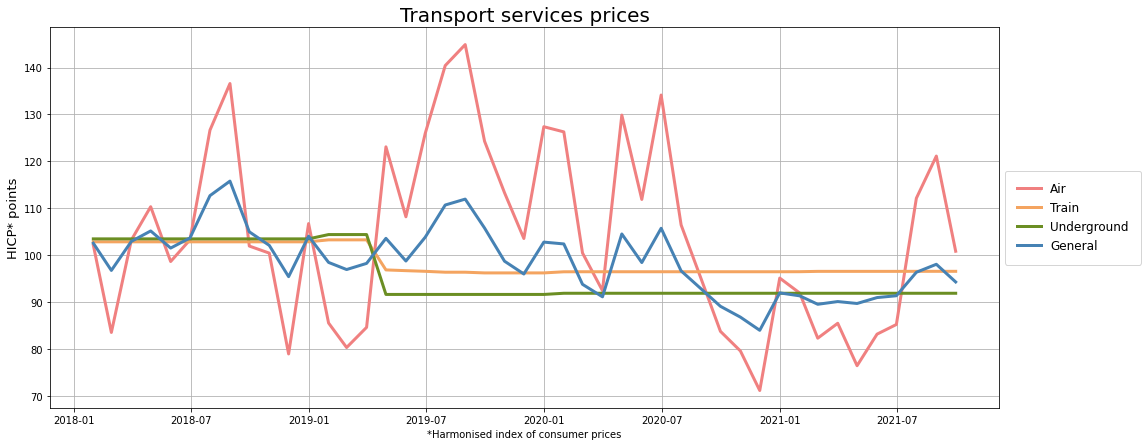

In [10]:
plt.subplots(figsize=(17, 7))

plt.plot( pd.to_datetime(df.index.tolist()), df['Air'].values.tolist(), color='lightcoral', linewidth=3, label="Air")
plt.plot( pd.to_datetime(df.index.tolist()), df['Train'].values.tolist(), color='sandybrown', linewidth=3, label="Train")
plt.plot( pd.to_datetime(df.index.tolist()), df['Underground'].values.tolist(),  color='olivedrab', linewidth=3, label="Underground")
plt.plot( pd.to_datetime(df.index.tolist()), df['General'].values.tolist(),  color='steelblue', linewidth=3, label="General")

plt.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)
plt.ylabel('HICP* points', fontsize=13)
plt.xlabel('*Harmonised index of consumer prices', fontsize=10)
plt.title("Transport services prices", size=20)
plt.show()